In [83]:
import numpy as np
import pandas as pd
from numpy import random
from numpy.random import randn
import matplotlib.pyplot as plt
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise
import kf_book.book_plots as bp

df = pd.read_csv('sensorData.csv')
uwb_x = df.uwb_x
uwb_y = df.uwb_y
# alternative column name: vel_linear_x
vel_linear_x = df['odom_filtered_linear_x'].fillna(0.0)
la_x = df.la_x
time = df.time
theta = df.odom_filtered_yaw

In [84]:
len(vel_linear_x)

1984

In [85]:
type(uwb_x)

pandas.core.series.Series

In [86]:
uwbXArray= uwb_x.to_numpy()

In [87]:
uwbXArray

array([0. , 0. , 0. , ..., 2.1, 2.1, 2.1])

In [88]:
len(uwbXArray)

1984

In [89]:
len(uwb_x)

1984

In [90]:
# first nonzero value for uwb_x
ini_index = uwb_x.ne(0).idxmax()

In [91]:
ini_index

5

In [92]:
uwb_y[ini_index]

2.21

In [93]:
def predict(pos, movement):
    return gaussian(pos.mean + movement.mean, pos.var + movement.var)

def gaussian_multiply(g1, g2):
    mean = (g1.var * g2.mean + g2.var * g1.mean) / (g1.var + g2.var)
    variance = (g1.var * g2.var) / (g1.var + g2.var)
    return gaussian(mean, variance)

def update(prior, likelihood):
    posterior = gaussian_multiply(likelihood, prior)
    return posterior

In [94]:
import kf_book.kf_internal as kf_internal
from collections import namedtuple
gaussian = namedtuple('Gaussian', ['mean', 'var'])
gaussian.__repr__ = lambda s: '(={:.3f}, 2={:.3f})'.format(s[0], s[1])
# note: A large variance implies that confidence is very low, 
# so the filter estimates the position to be very close to the measurement
# specific to the robot
process_std = 0.028
process_var = 0.028 ** 2
process_var_lateral = 0.019 **2
sensor_std = 0.077
sensor_var = 0.077 ** 2
# sensor_var = 0.3 ** 2
# initial uwb_x: around 2 when real tag value received and written, otherwise 0.0
x = gaussian(uwb_x[ini_index], sensor_var) # robot's initial position(x-coordinate): first non-zero value of uwb_x

# if changed to 0.1 the kf precision will be lower
dt = 0.01

# measurements are uwb_x
# Kalman filter
print('    PREDICT\t\tMEASURE    UPDATE')
print('  x\t   var\t\tz\t  x\t  var')
# perform kf on measurement
for i, z in enumerate(uwb_x[ini_index:]):
    velocity = vel_linear_x[i]
    process_model = gaussian(velocity*dt, process_var)
    prior = predict(x, process_model)
    likelihood = gaussian(z, sensor_var)
    x = update(prior, likelihood)
    
    kf_internal.print_gh(prior, x, z)
print('final estimate X-coordinate:\t{:10.3f} m'.format(x.mean))
print('tag final position:\t\t{:10.3f} m'.format(uwb_x.iloc[-1]))

    PREDICT		MEASURE    UPDATE
  x	   var		z	  x	  var
  1.880    0.007	1.880	  1.880   0.003
  1.880    0.004	1.880	  1.880   0.002
  1.880    0.003	1.880	  1.880   0.002
  1.880    0.003	1.880	  1.880   0.002
  1.880    0.003	1.880	  1.880   0.002
  1.880    0.003	1.880	  1.880   0.002
  1.880    0.003	1.880	  1.880   0.002
  1.880    0.003	1.880	  1.880   0.002
  1.880    0.003	1.880	  1.880   0.002
  1.880    0.003	1.870	  1.877   0.002
  1.877    0.003	1.870	  1.875   0.002
  1.875    0.003	1.870	  1.873   0.002
  1.873    0.003	1.870	  1.872   0.002
  1.872    0.003	1.870	  1.872   0.002
  1.872    0.003	1.870	  1.871   0.002
  1.871    0.003	1.870	  1.871   0.002
  1.871    0.003	1.870	  1.871   0.002
  1.871    0.003	1.870	  1.870   0.002
  1.870    0.003	1.890	  1.876   0.002
  1.876    0.003	1.890	  1.880   0.002
  1.880    0.003	1.890	  1.883   0.002
  1.883    0.003	1.890	  1.885   0.002
  1.885    0.003	1.890	  1.887   0.002
  1.887    0.003	1.890	  1.888   0.002
  1.888  

  2.663    0.003	2.650	  2.659   0.002
  2.664    0.003	2.650	  2.660   0.002
  2.665    0.003	2.710	  2.679   0.002
  2.684    0.003	2.710	  2.692   0.002
  2.697    0.003	2.710	  2.701   0.002
  2.706    0.003	2.710	  2.707   0.002
  2.712    0.003	2.710	  2.712   0.002
  2.717    0.003	2.710	  2.715   0.002
  2.720    0.003	2.710	  2.717   0.002
  2.722    0.003	2.710	  2.718   0.002
  2.723    0.003	2.710	  2.719   0.002
  2.724    0.003	2.770	  2.738   0.002
  2.743    0.003	2.770	  2.751   0.002
  2.757    0.003	2.770	  2.761   0.002
  2.766    0.003	2.770	  2.767   0.002
  2.772    0.003	2.770	  2.772   0.002
  2.777    0.003	2.770	  2.775   0.002
  2.780    0.003	2.770	  2.777   0.002
  2.782    0.003	2.770	  2.778   0.002
  2.784    0.003	2.770	  2.779   0.002
  2.785    0.003	2.770	  2.780   0.002
  2.785    0.003	2.820	  2.796   0.002
  2.801    0.003	2.820	  2.807   0.002
  2.812    0.003	2.820	  2.814   0.002
  2.820    0.003	2.820	  2.820   0.002
  2.825    0.003	2.820	  

  3.107    0.003	3.110	  3.108   0.002
  3.102    0.003	3.110	  3.105   0.002
  3.099    0.003	3.110	  3.102   0.002
  3.097    0.003	3.110	  3.101   0.002
  3.095    0.003	3.110	  3.100   0.002
  3.094    0.003	3.110	  3.099   0.002
  3.093    0.003	3.110	  3.098   0.002
  3.093    0.003	3.110	  3.098   0.002
  3.093    0.003	3.080	  3.089   0.002
  3.083    0.003	3.080	  3.082   0.002
  3.077    0.003	3.080	  3.078   0.002
  3.072    0.003	3.080	  3.074   0.002
  3.069    0.003	3.080	  3.072   0.002
  3.067    0.003	3.080	  3.071   0.002
  3.065    0.003	3.080	  3.070   0.002
  3.064    0.003	3.080	  3.069   0.002
  3.064    0.003	3.080	  3.069   0.002
  3.063    0.003	3.080	  3.068   0.002
  3.063    0.003	3.080	  3.068   0.002
  3.062    0.003	3.020	  3.050   0.002
  3.044    0.003	3.020	  3.037   0.002
  3.031    0.003	3.020	  3.028   0.002
  3.022    0.003	3.020	  3.022   0.002
  3.016    0.003	3.020	  3.017   0.002
  3.012    0.003	3.020	  3.014   0.002
  3.009    0.003	3.020	  

  3.933    0.003	3.930	  3.932   0.002
  3.935    0.003	3.930	  3.934   0.002
  3.937    0.003	3.930	  3.935   0.002
  3.938    0.003	3.930	  3.935   0.002
  3.938    0.003	3.930	  3.935   0.002
  3.938    0.003	3.930	  3.936   0.002
  3.938    0.003	3.930	  3.936   0.002
  3.938    0.003	3.930	  3.936   0.002
  3.938    0.003	3.930	  3.935   0.002
  3.938    0.003	3.930	  3.935   0.002
  3.937    0.003	3.930	  3.935   0.002
  3.937    0.003	3.930	  3.935   0.002
  3.937    0.003	3.930	  3.935   0.002
  3.937    0.003	3.930	  3.935   0.002
  3.937    0.003	3.930	  3.935   0.002
  3.937    0.003	3.930	  3.935   0.002
  3.937    0.003	3.930	  3.935   0.002
  3.937    0.003	3.930	  3.935   0.002
  3.937    0.003	3.930	  3.935   0.002
  3.936    0.003	3.930	  3.934   0.002
  3.936    0.003	3.930	  3.934   0.002
  3.936    0.003	3.930	  3.934   0.002
  3.936    0.003	3.930	  3.934   0.002
  3.936    0.003	3.930	  3.934   0.002
  3.935    0.003	3.930	  3.934   0.002
  3.935    0.003	3.930	  

In [95]:
from kf_book import book_plots as book_plots
from ipywidgets import interact
from ipywidgets.widgets import IntSlider

# save output in these lists for plotting
xs, predictions = [], []

# process_model = gaussian(velocity, process_var) 

# perform Kalman filter
# x = gaussian(0., 20.**2)
for z in uwb_x[ini_index:]:    
    prior = predict(x, process_model)
    likelihood = gaussian(z, sensor_var)
    x = update(prior, likelihood)

    # save results
    predictions.append(prior.mean)
    xs.append(x.mean)

def plot_filter(step):
    plt.cla()
    step -= 1
    i = step // 3 + 1
 
    book_plots.plot_predictions(predictions[:i])    
    zs = uwb_x[ini_index:]
    if step % 3 == 0:
        book_plots.plot_measurements(zs[:i-1])
        book_plots.plot_filter(xs[:i-1])
    elif step % 3 == 1:
        book_plots.plot_measurements(zs[:i])
        book_plots.plot_filter(xs[:i-1])
    else:
        book_plots.plot_measurements(zs[:i])
        book_plots.plot_filter(xs[:i])
    
#     figure(figsize=(16, 12), dpi=80)
    plt.rcParams.update({'font.size': 14})
    plt.xlim(-50, len(uwb_x) + 75)
    plt.ylim(min(uwb_x) - 0.5, max(uwb_x) + 0.5)
    plt.xlabel("Number of measurements")
    plt.ylabel("X-coordinate (m)")
#     loc=2
    plt.legend(loc='lower right', prop={'size': 12})    
#     plt.savefig('kalman_real_velocity.pdf', dpi=300)
# value denotes the initial value of the slider
interact(plot_filter, step=IntSlider(value=len(predictions)*3, min=1, max=len(predictions)*3));

interactive(children=(IntSlider(value=5937, description='step', max=5937, min=1), Output()), _dom_classes=('wi…

In [96]:
# from numpy import array

# def plot_fusion(xs, ts, zs_ps, zs_wheel):
#     xs = np.array(xs)
#     plt.subplot(211)
#     plt.plot(zs_ps[:, 0], zs_ps[:, 1], ls='--', label='Pos Sensor')
#     plot_filter(xs=ts, ys=xs[:, 0], label='Kalman filter')
# #     set_labels(title='Position', y='meters',)

#     plt.subplot(212)
#     plot_measurements(zs_wheel[:, 0], zs_wheel[:, 1],  label='Wheel')
#     plot_filter(xs=ts, ys=xs[:, 1], label='Kalman filter')
#     set_labels('Velocity', 'time (sec)', 'meters/sec')
    

# def fusion_test(pos_data, vel_data, wheel_std, ps_std):
#     kf = KalmanFilter(dim_x=2, dim_z=1)
#     kf.F = array([[1., 1.], [0., 1.]])
#     kf.H = array([[1., 0.], [1., 0.]])
#     kf.x = array([[0.], [1.]])
#     kf.P *= 100

#     xs, ts = [],  []
    
#     # copy data for plotting
#     zs_wheel = np.array(vel_data)
#     zs_ps = np.array(pos_data)
                     
#     last_t = 0
#     i = 0
#     while len(pos_data) > 0 and len(vel_data) > 0:
#         t = time[i]
#         dt = t - last_t
#         last_t = t
#         z = pos_data.pop(0)
#         vel_data.pop(0)
#         kf.H = np.array([[1., 0.]])
#         kf.R[0,0] = ps_std**2
        
#         kf.F[0,1] = dt
#         kf.Q = Q_discrete_white_noise(2, dt=dt, var=.02)
#         kf.predict()
#         kf.update(np.array([z]))

#         xs.append(kf.x.T[0])
#         ts.append(t)
#     plot_fusion(xs, ts, zs_ps, zs_wheel)


# pos_data, vel_data = uwb_x[ini_index:], vel_linear_x[ini_index:]
# fusion_test(pos_data, vel_data, process_std, sensor_std);

Now we try KalmanFilter from filterpy:

In [97]:
def pos_vel_filter(x, P, R, Q=0., dt=1.0):
    """ Returns a first order KalmanFilter which implements a
    constant velocity model for a state [x dx].T
    """
    
    kf = KalmanFilter(dim_x=2, dim_z=1)
    kf.x = np.array([x[0], x[1]]) # location and velocity
    kf.F = np.array([[1., dt],
                     [0.,  1.]])  # state transition matrix
    # Measurement function, which denotes our UWB can return X-coordinate but no velocity infomation
    kf.H = np.array([[1., 0]])    
    kf.R *= R                     # measurement uncertainty
    if np.isscalar(P):
        kf.P *= P                 # covariance matrix 
    else:
        kf.P[:] = P               # [:] makes deep copy
    if np.isscalar(Q):
        kf.Q = Q_discrete_white_noise(dim=2, dt=dt, var=Q)
    else:
        kf.Q[:] = Q
    return kf

In [98]:
dt = 0.01
# initial X-coordinate and velocity
x = np.array([uwb_x[ini_index], vel_linear_x[0]]) 
kf = pos_vel_filter(x, P=np.diag([sensor_var, 0.1736111111]), R=sensor_var, Q=process_var, dt=dt)

In [99]:
kf

KalmanFilter object
dim_x = 2
dim_z = 1
dim_u = 0
x = [1.88 0.  ]
P = [[0.005929   0.        ]
     [0.         0.17361111]]
x_prior = [[0. 0.]].T
P_prior = [[1. 0.]
           [0. 1.]]
x_post = [[0. 0.]].T
P_post = [[1. 0.]
          [0. 1.]]
F = [[1.   0.01]
     [0.   1.  ]]
Q = [[1.96e-12 3.92e-10]
     [3.92e-10 7.84e-08]]
R = [[0.005929]]
H = [[1. 0.]]
K = [[0. 0.]].T
y = [[0.]]
S = [[0.]]
SI = [[0.]]
M = [[0.]]
B = None
z = [[None]]
log-likelihood = -708.3964185322641
likelihood = 2.2250738585072014e-308
mahalanobis = 0.0
alpha = 1.0
inv = <function inv at 0x7f3e2812c3b0>

In [100]:
from filterpy.common import Saver
# P: covariance matrix
f = pos_vel_filter(x=(uwb_x[ini_index], 0.), R=sensor_var, Q=process_var, P=500)

def filter_data(f, zs):
    s = Saver(f)
    Xs, Covs, _, _ = f.batch_filter(zs, saver=s)
    s.to_array()
    plt.plot(s.y)
    return s
# plt.savefig('residual.pdf', dpi=300)

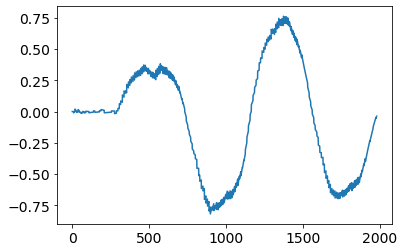

In [101]:
zs = uwb_x[ini_index:]
data1 = filter_data(kf, zs)

In [102]:
xs

[2.0329372788088818,
 1.9861098813109281,
 1.9534937705924205,
 1.9307760725087622,
 1.9149527939249245,
 1.9039316004827131,
 1.8962551442889441,
 1.8909083567560112,
 1.8871842246564194,
 1.8815554776670824,
 1.8776349558183358,
 1.8749042429979481,
 1.8730022532131407,
 1.8716774836824517,
 1.870754758269592,
 1.8701120636968278,
 1.8696644155578428,
 1.8693526207102922,
 1.8752050962900364,
 1.8792814490596863,
 1.8821207008730807,
 1.884098289986536,
 1.8854757157869553,
 1.8864351172231546,
 1.8871033572949616,
 1.887568798325921,
 1.8878929862374825,
 1.888118788852662,
 1.8852412412652029,
 1.883236978467672,
 1.881840973974445,
 1.8808686321500545,
 1.8801913788689613,
 1.879719659978293,
 1.879391099426391,
 1.8791622511898638,
 1.879002854344873,
 1.8788918316226593,
 1.884884148539293,
 1.8890579032738342,
 1.8919649972787835,
 1.893989839678763,
 1.8954001782291414,
 1.896382503977903,
 1.897066711238933,
 1.8975432736996405,
 1.8978752078837557,
 1.8950715828114926,
 1.89

In [103]:
data1.x

array([[ 1.88      ,  0.        ],
       [ 1.88      ,  0.        ],
       [ 1.88      ,  0.        ],
       ...,
       [ 2.14532506, -0.35563697],
       [ 2.141414  , -0.35578821],
       [ 2.13753466, -0.35592528]])

In [104]:
data1.z

array([[1.88],
       [1.88],
       [1.88],
       ...,
       [2.1 ],
       [2.1 ],
       [2.1 ]])

In [105]:
# Only as reference!
def plot_kf_output(xs, filter_xs, zs, title=None, aspect_equal=True):
    plot_filter(filter_xs[:, 0])
    plot_track(xs[:, 0])

    if zs is not None:
        plot_measurements(zs)
    show_legend()
    set_labels(title=title, y='meters', x='time (sec)')
    if aspect_equal:
        plt.gca().set_aspect('equal')
    plt.xlim((-1, len(xs)))
    plt.show()

In [106]:
from kf_book.book_plots import plot_kf_output
# y-lim should be adjusted!
# plot_kf_output(xs, data1.x, data1.z)

In [107]:
# try to get turning point of uwb_x
from scipy.signal import argrelextrema
argrelextrema(uwbXArray, np.less)

(array([], dtype=int64),)

In [108]:
import math

def compute_track(z_var, process_var, count=1, dt=0.01):
    "returns track 1D ndarrays"
    x = uwb_x[ini_index]
    z_std = math.sqrt(z_var) 
    p_std = math.sqrt(process_var)
    xs, zs = [], []
    for i in range(count - 1):
        vel = 0.5 if i < 1957 and vel_linear_x[i] else 0.0
        if vel:
            v = vel + (randn() * p_std)
        else:
            v = 0.0
        if i < 736 or 1132 <= i < 1530:
            x += v*dt        
        else:
            x -= v*dt
        xs.append(x)
        zs.append(x + randn() * z_std)        
    xs.append(xs[-1])
    return np.array(xs)

In [109]:
from kf_book.mkf_internal import plot_covariance

def plot_track(ps, actual, zs, cov, std_scale=1,
               plot_P=True, y_lim=None,
               xlabel='time', ylabel='position',
               title='Kalman Filter'):

    count = len(zs)
    zs = np.asarray(zs)

    cov = np.asarray(cov)
    std = std_scale * np.sqrt(cov[:, 0, 0])
    std_top = np.minimum(actual+std, [count + 10])
    std_btm = np.maximum(actual-std, [-50])

    std_top = actual + std
    std_btm = actual - std

    bp.plot_track(actual, c='k')
    bp.plot_measurements(range(1, count + 1), zs)
    bp.plot_filter(range(1, count + 1), ps)

    plt.plot(std_top, linestyle=':', color='k', lw=1, alpha=0.4)
    plt.plot(std_btm, linestyle=':', color='k', lw=1, alpha=0.4)
    plt.fill_between(range(len(std_top)), std_top, std_btm,
                     facecolor='yellow', alpha=0.2, interpolate=True)
    plt.legend(loc=4)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if y_lim is not None:
        plt.ylim(y_lim)
    else:
        plt.ylim((-50, count + 10))

    plt.xlim((-50, count + 50))
    plt.title(title)
    plt.show()
#     plt.savefig('kalman_with_track.pdf', dpi=300)

    if plot_P:
        ax = plt.subplot(121)
        ax.set_title(r"$\sigma^2_x$ (pos variance)")
        plot_covariance(cov, (0, 0))
        ax = plt.subplot(122)
        ax.set_title(r"$\sigma^2_\dot{x}$ (vel variance)")
        plot_covariance(cov, (1, 1))
        plt.show()        

In [110]:
def run(x0=(0.,0.), P=500, R=0, Q=0, dt=1.0, 
        track=None, zs=None,
        count=0, do_plot=True, **kwargs):
    """
    track is the actual position of the robot, zs are the 
    corresponding measurements. 
    """

    # if no data provided. 
    if zs is None:
        print(f"Measurements are necessary!")
        
    if not track:
        print(f"count = {count}")
        track = compute_track(R, Q, count)

    # create the Kalman filter
    kf = pos_vel_filter(x0, R=R, P=P, Q=Q, dt=dt)  

    # run the kalman filter and store the results
    xs, cov = [], []
    for z in zs:
        kf.predict()
        kf.update(z)
        xs.append(kf.x)
        cov.append(kf.P)

    xs, cov = np.array(xs), np.array(cov)
    print(f"cov = {cov}")
    if do_plot:
#       plot_track(xs[:, 0], track, zs, cov, dt=dt, **kwargs)  
        plot_track(xs[:, 0], track, zs, cov, y_lim=(min(uwb_x) - 0.5, max(uwb_x) + 0.5) , xlabel="Number of measurements", ylabel="X-coordinate (m)", **kwargs)
    return xs, cov

## Control Inputs

[[10.  0.]
 [ 0. 10.]]


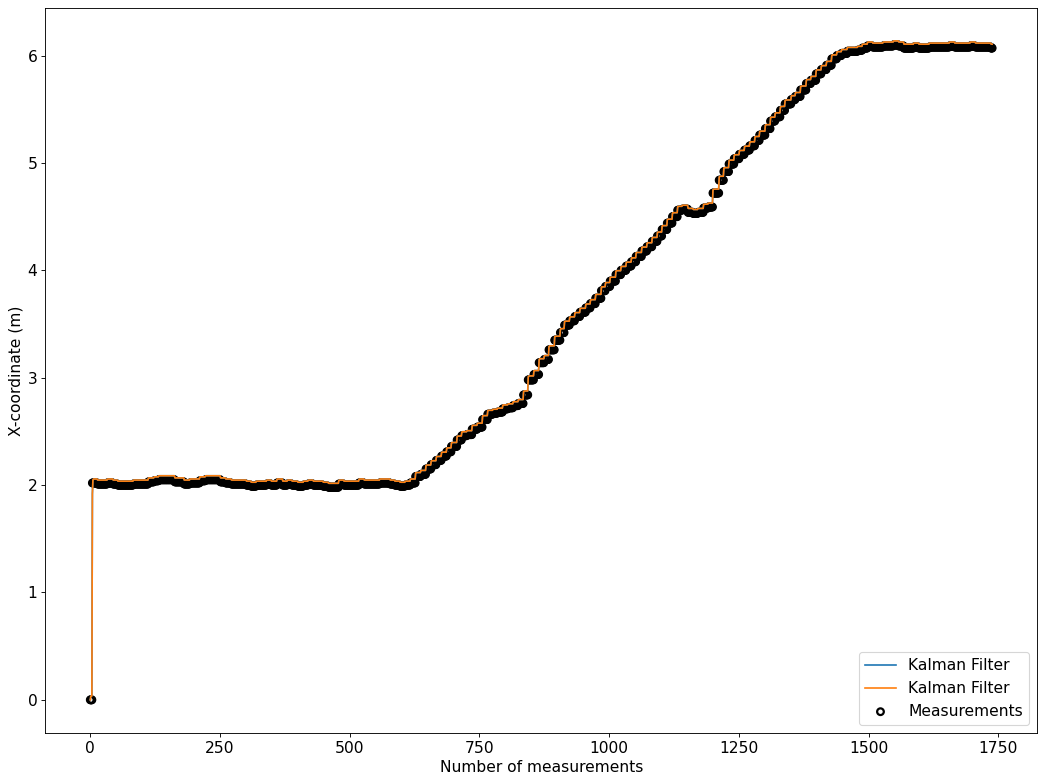

In [111]:
from matplotlib.pyplot import figure

cdf = pd.read_csv('straightControl.csv')
cuwb_x = cdf.uwb_x
uwb_y = cdf.uwb_y
vel_linear_x = cdf['vel_linear_x'].fillna(0.0)
la_x = cdf.la_x

dt = 1.
R = sensor_var
kf = KalmanFilter(dim_x=2, dim_z=1, dim_u = 1)
kf.P *= 10
kf.R *= R

# Here process_var is definitely not a proper parameter, because the remote control is not perfect, 
# it can't be exactly constant velocity of 0.5 m/s although assigned so

kf.Q = Q_discrete_white_noise(2, dt, 0.3)
kf.F = np.array([[1., 0], [0., 0.]])
kf.B = np.array([[dt], [ 1.]])
kf.H = np.array([[1., 0]])
print(kf.P)

zs = cuwb_x
xs = []
cmd_velocity = np.array([0.5])
for z in zs:
    kf.predict(u=cmd_velocity)
    kf.update(z)
    xs.append(kf.x[0])
    
figure(figsize=(16, 12), dpi=80)
plt.plot(xs, label='Kalman Filter')
bp.plot_measurements(zs)
plt.xlabel('Number of measurements')
plt.legend(loc=4)
plt.ylabel('X-coordinate (m)')
plt.rcParams.update({'font.size': 22})
# plt.savefig("kalman_with_control.pdf", dpi=300)

In [112]:
len(cdf)

1739

In [113]:
type(la_x)

pandas.core.series.Series

In [114]:
xs0 = [i[0] for i in xs]
xs1 = [i[0] for i in xs]

In [115]:
xs0

[0.0002940701199264928,
 0.03415186433193301,
 0.036632351537774555,
 0.03680326401880801,
 1.9182795455989268,
 2.0473147691021913,
 2.0561642502644077,
 2.0567711645217224,
 2.0568127878563542,
 2.056815642463846,
 2.0568158382382595,
 2.0568158516648416,
 2.056815852585662,
 2.0568158526488136,
 2.0475016716816157,
 2.046862887427423,
 2.0468190783877613,
 2.0468160738804597,
 2.046815867825632,
 2.0468158536939995,
 2.0468158527248255,
 2.0468158526583577,
 2.046815852653799,
 2.0468158526534865,
 2.0468158526534648,
 2.0468158526534634,
 2.0468158526534634,
 2.0468158526534634,
 2.0468158526534634,
 2.0468158526534634,
 2.0468158526534634,
 2.0468158526534634,
 2.0468158526534634,
 2.0561300336249926,
 2.0567688178794823,
 2.056812626919164,
 2.0568156314264674,
 2.0568158374812953,
 2.0568158516129276,
 2.0568158525821016,
 2.0568158526485694,
 2.056815852653128,
 2.0568158526534406,
 2.056815852653462,
 2.0475016716819345,
 2.046862887427445,
 2.046819078387763,
 2.0468160738804

In [116]:
xs1

[0.0002940701199264928,
 0.03415186433193301,
 0.036632351537774555,
 0.03680326401880801,
 1.9182795455989268,
 2.0473147691021913,
 2.0561642502644077,
 2.0567711645217224,
 2.0568127878563542,
 2.056815642463846,
 2.0568158382382595,
 2.0568158516648416,
 2.056815852585662,
 2.0568158526488136,
 2.0475016716816157,
 2.046862887427423,
 2.0468190783877613,
 2.0468160738804597,
 2.046815867825632,
 2.0468158536939995,
 2.0468158527248255,
 2.0468158526583577,
 2.046815852653799,
 2.0468158526534865,
 2.0468158526534648,
 2.0468158526534634,
 2.0468158526534634,
 2.0468158526534634,
 2.0468158526534634,
 2.0468158526534634,
 2.0468158526534634,
 2.0468158526534634,
 2.0468158526534634,
 2.0561300336249926,
 2.0567688178794823,
 2.056812626919164,
 2.0568156314264674,
 2.0568158374812953,
 2.0568158516129276,
 2.0568158525821016,
 2.0568158526485694,
 2.056815852653128,
 2.0568158526534406,
 2.056815852653462,
 2.0475016716819345,
 2.046862887427445,
 2.046819078387763,
 2.0468160738804

In [117]:
# concatenate la_x to xs
xs = pd.concat([pd.Series(np.array(xs0).reshape(len(cdf))), pd.Series(np.array(xs1).reshape(len(cdf))), la_x], axis=1)    

In [118]:
xs

,0,1,la_x
0,0.000294,0.000294,0.000000
1,0.034152,0.034152,0.000000
2,0.036632,0.036632,0.000000
3,0.036803,0.036803,0.000000
4,1.918280,1.918280,0.000000
...,...,...,...
1734,6.116816,6.116816,-0.057046
1735,6.116816,6.116816,-0.057046
1736,6.107502,6.107502,-0.057046
1737,6.106863,6.106863,-0.055311


In [119]:
def SecondOrderKF(R_std, Q, dt, P=1):
    """ Create second order Kalman filter. 
    Specify R and Q as floats."""
    
    kf = KalmanFilter(dim_x=3, dim_z=1)
    kf.x = np.array([uwb_x[ini_index], 0., 0.])
    kf.P[0, 0] = P
    kf.P[1, 1] = 1
    kf.P[2, 2] = 1
    kf.R *= R_std**2
    kf.Q = Q_discrete_white_noise(3, dt, Q)
    kf.F = np.array([[1., dt, .5*dt*dt],
                     [0., 1.,       dt],
                     [0., 0.,       1.]])
    kf.H = np.array([[1., 0., 0.]])
    return kf

TypeError: '(slice(None, None, None), 0)' is an invalid key

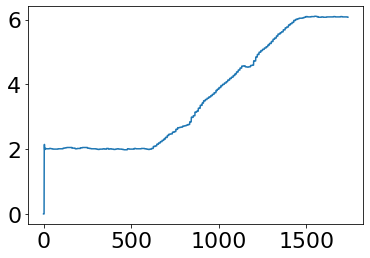

In [120]:
kf0 = SecondOrderKF(sensor_var, process_var, dt=1)
kf1 = SecondOrderKF(sensor_var, process_var, dt=1)
kf2 = SecondOrderKF(sensor_var, process_var, dt=1)

# Filter measurements
fxs0, ps0, _, _ = kf0.batch_filter(cuwb_x)

# filter twice more, using the state as the input
fxs1, ps1, _, _ = kf1.batch_filter(fxs0[:, 0])
fxs2, _, _, _ = kf2.batch_filter(fxs1[:, 0])

plot_kf_output(xs, fxs0, zs, 'KF', False)
plot_kf_output(xs, fxs1, zs, '1 iteration', False)
plot_kf_output(xs, fxs2, zs, '2 iterations', False)
plt.xlabel('Number of measurements')
# plt.legend(loc=4)
plt.ylabel('X-coordinate (m)')
sensor_var, process_var

In [ ]:
len(xs)

Now let's see the measurements under remote control alone of polygon movement:

In [122]:
import plotly.graph_objects as go
# polygon trajectory remote control
ptdf = pd.read_csv('control.csv')
puwb_x = ptdf.uwb_x
puwb_y = ptdf.uwb_y
pvel_linear_x = ptdf.vel_linear_x
theta = ptdf.odom_filtered_yaw
# first nonzero value for uwb_x
ini_index = puwb_x.ne(0).idxmax()

xm = np.min(puwb_x) - 0.5
xM = np.max(puwb_x) + 0.5
ym = np.min(puwb_y) - 0.5
yM = np.max(puwb_y) + 0.5

# parameter duration: the smaller, the faster the animation is
fig = go.Figure(
    # name='trace' can be a param inside go.Scatter
    # duplicate go.Scatter is only for demonstration
    data=[go.Scatter(x=puwb_x[ini_index:], y=puwb_y[ini_index:],
                     mode="lines",
                     line=dict(width=2, color="pink")),
          go.Scatter(x=puwb_x[ini_index:], y=puwb_y[ini_index:],
                     mode="lines",
                     line=dict(width=2, color="pink")),
          # go.Scatter(x=x, y=y,
          #            mode="lines",
          #            line=dict(width=2, color="blue")),
          ],
    layout=go.Layout(
        xaxis=dict(title='uwb_x (m)', range=[xm, xM],
                   autorange=False, zeroline=False),
        yaxis=dict(title='uwb_y (m)', range=[ym, yM],
                   autorange=False, zeroline=False),
        title_text="UWB Measurements over time", hovermode="closest",
        updatemenus=[dict(type="buttons",
                          buttons=[dict(args=[None, {"frame": {"duration": 1,
                                                               "redraw": False},
                                                     "fromcurrent": True,
                                                     "transition": {"duration": 0.1}}],
                                        label="Play",
                                        method="animate"
                                        )])]),
    frames=[go.Frame(
        data=[go.Scatter(
            x=[puwb_x[k]],
            y=[puwb_y[k]],
            mode="markers",
            name='tag in the trace',
            marker=dict(color="red", size=10))])
            for k in range(ini_index, len(ptdf))]
)

fig.add_trace(go.Scatter(
    x=[puwb_x[ini_index], puwb_x[len(ptdf) - 1]],
    y=[puwb_y[ini_index], puwb_y[len(ptdf) - 1]],
    mode="markers+text",
    name="Start and End",
    text=["Start", "End"],
    textposition="bottom center"
))

fig.show()

From above plot we can see the huge noise in the measurement data.

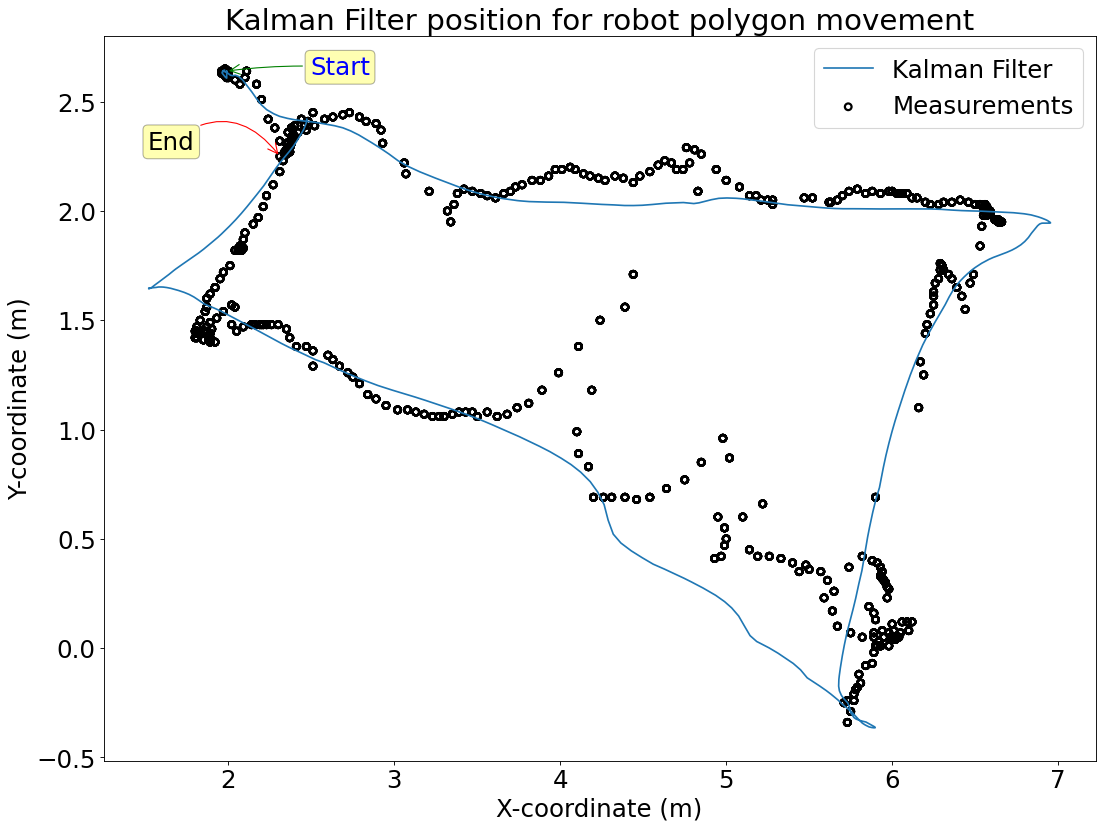

In [138]:
df1 = pd.read_csv('control.csv')
uwb_x1 = df1.uwb_x
uwb_y1 = df1.uwb_y
vel_linear_x1 = df1['vel_linear_x'].fillna(0.0)
# first nonzero value for uwb_x
ini_index1 = uwb_x1.ne(0).idxmax()
def track():
    tracker = KalmanFilter(dim_x=4, dim_z=2)
    dt = 0.01
    tracker.F = np.array([[1, dt, 0,  0],
                          [0,  1, 0,  0],
                          [0,  0, 1, dt],
                          [0,  0, 0,  1]])
    tracker.u = 0.
    tracker.H = np.array([[1., 0., 0., 0], [0., 0., 1., 0.]])

    tracker.R = np.array([[sensor_var, 0], [0, sensor_var_lateral]])
    q_forward = Q_discrete_white_noise(dim=2, dt=dt, var=process_var)
    q_lateral = Q_discrete_white_noise(dim=2, dt=dt, var=process_var_lateral)
    tracker.Q = block_diag(q_forward, q_lateral)
#     print(f"Q = {tracker.Q}")
    tracker.x = np.array([[uwb_x1[ini_index1], vel_linear_x1[0], uwb_y1[ini_index1], 0]]).T
    tracker.P = np.eye(4) * 0.5
    return tracker
# robot circle movement
N = len(uwb_x1[ini_index1:])
zs1 = np.array([[uwb_x1[i], uwb_y1[i]] for i in range(ini_index1, N)])

# run filter
robot_tracker = track()
# batch_filter is quite slow
mu, cov, _, _ = robot_tracker.batch_filter(zs1[ini_index1:])

# plot result
figure(figsize=(16, 12), dpi=80)
plt.rcParams.update({'font.size': 22})
bp.plot_filter(mu[:, 0], mu[:, 2], label='Kalman Filter')
bp.plot_measurements(zs1[ini_index1:, 0], zs1[ini_index1:, 1])
plt.title('Kalman Filter position for robot polygon movement')
plt.xlabel("X-coordinate (m)")
plt.ylabel("Y-coordinate (m)")
plt.annotate("Start", xy=(zs1[ini_index1][0], zs1[ini_index1][1]), xytext=(zs1[ini_index1][0] + 100, zs1[ini_index1][1] - 10), textcoords='offset points', ha='center', va='bottom',color='blue',
         bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
         arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.05', 
                            color='green'))
plt.annotate("End", xy=(zs1[-1][0], zs1[-1][1]), xytext=(zs1[-1][0] - 100, zs1[-1][1]), textcoords='offset points', ha='center', va='bottom',
         bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
         arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.5', 
                            color='red'))
plt.legend(loc="best")
# plt.show()
# plt.savefig('control.pdf', dpi=300)

## Second Order KF with control Input

In [49]:
from scipy.linalg import block_diag
sensor_var_lateral = 0.125 ** 2

def track():
#     , dim_u=1
# u = [lin_x, lin_y]
    tracker = KalmanFilter(dim_x=4, dim_z=2, dim_u=1)
    dt = 0.01
    tracker.F = np.array([[1, dt, 0,  0],
                          [0,  1, 0,  0],
                          [0,  0, 1, dt],
                          [0,  0, 0,  1]])
#     tracker.u = np.array([0.5])
#     tracker.u = 0
    tracker.H = np.array([[1., 0., 0., 0], [0., 0., 1., 0.]])

    tracker.R = np.array([[sensor_var, 0], [0, sensor_var_lateral]])
    q_forward = Q_discrete_white_noise(dim=2, dt=dt, var=process_var)
    q_lateral = Q_discrete_white_noise(dim=2, dt=dt, var=process_var_lateral)
    tracker.Q = block_diag(q_forward, q_lateral)
    tracker.x = np.array([[puwb_x[ini_index], pvel_linear_x[0], puwb_y[ini_index], 0]]).T
    tracker.P = np.eye(4) * 0.5
    return tracker
# robot polygon movement with remote control alone
N = len(puwb_x)
zs1 = np.array([[puwb_x[i], puwb_y[i]] for i in range(ini_index, N)])

# run filter
robot_tracker = track()
# batch_filter is quite slow
mu, cov, _, _ = robot_tracker.batch_filter(zs1)

for x, P in zip(mu, cov):
#     covariance or x and y
    cov = np.array([[P[0, 0], P[2, 0]],
                   [P[0, 2], P[2, 2]]])
    mean = (x[0, 0], x[2, 0])
#     print(f"mean = {mean}, \n cov = {cov}")
#     plot_covariance(cov, mean)
    plot_covariance_ellipse(mean, cov=cov, fc='g', std=3, alpha=0.5)

# plot result
bp.plot_filter(mu[:, 0], mu[:, 2])
bp.plot_measurements(zs1[:, 0], zs1[:, 1])
plt.title('Kalman Filter position for robot polygon movement with remote control alone')
plt.xlabel("X-coordinate (m)")
plt.ylabel("Y-coordinate (m)")
plt.legend(loc='best')
# plt.show()
# plt.savefig('kf_control.pdf', dpi=300)

ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

In [ ]:
# dt = 1.
# R = sensor_var
# kf = KalmanFilter(dim_x=4, dim_z=2, dim_u = 1)
# kf.P *= 10
# kf.R *= R

# # Here process_var is definitely not a proper parameter, because the remote control is not perfect, 
# # it can't be exactly constant velocity of 0.5 m/s although assigned so

# kf.Q = Q_discrete_white_noise(4, dt, 0.3)
# kf.F = np.array([[1., dt, 0, 0], # x = x0 + dx*dt
#                  [0., 1, 0, 0.], # dx = dx0
#                  [0., 0, 1, dt], # y = y0 + dy*dt
#                  [0., 0, 0, 1]]) # dy = dy0
# kf.B = np.array([[0, dt, 0, 0]]).T
# kf.H = np.array([[1., 0, 0, 0], [0, 0, 1, 0]])
# print(f"kf.P =")
# print(kf.P)

# zs = np.array([puwb_x, puwb_y]).T
# xs = []
# cmd_velocity = np.array([0.5])
# for z in zs:
# #     print(f"z.shape = {z.shape}")
#     kf.predict(u=cmd_velocity)
#     kf.update(z)
#     xs.append(kf.x[0])
    
# figure(figsize=(16, 12), dpi=80)
# plt.plot(xs, label='Kalman Filter')
# bp.plot_measurements(zs)
# plt.xlabel('Number of measurements')
# plt.legend(loc=4)
# plt.ylabel('X-coordinate (m)')
# plt.rcParams.update({'font.size': 22})
# # plt.savefig("kalman_with_control.pdf", dpi=300)

In [75]:
# # initial uncertainty: measurement variance for x-coordinate,
# and x-vel (small value means quite certain)
# maximum speed for the robot is 1.25 m/s, 3 * sigma = 1.25, sigma ** 2 can be calculated
P = np.diag([sensor_var, 0.1736111111])
# set do_plot=False if track data is not available
Ms, Ps = run(x0=x, count=len(uwb_x[ini_index:]), R=sensor_var, Q=process_var, P=P, zs=uwb_x[ini_index:], do_plot=True)

count = 1974


KeyError: 0

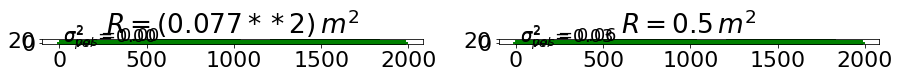

In [76]:
from kf_book.mkf_internal import plot_track_ellipses

def plot_covariances(count, R, Q=process_var, P=sensor_var, title=''):    
    zs = uwb_x
    f = pos_vel_filter(x=(uwb_x[ini_index], 0.), R=R, Q=Q, P=P)

    xs, cov = [], []
    for z in zs:
        f.predict()
        f.update(z)

        xs.append(f.x[0])
        cov.append(f.P)
    plot_track_ellipses(count, zs, xs, cov, title)

plt.figure(figsize=(15,9))
plt.subplot(121)
plot_covariances(R=sensor_var, Q=process_var, count=len(uwb_x), title='$R = (0.077 ** 2)\, m^2$')
plt.subplot(122)
plot_covariances(R=.1, Q=.02, count=len(uwb_x), title='$R = 0.5\, m^2$')

# Batch Processing

In [ ]:
count = len(uwb_x)
zs = uwb_x
# P = np.diag([500., 49.])
f = pos_vel_filter(x=(uwb_x[ini_index], 0.), R=sensor_var, Q=process_var, P=P)
xs, _, _, _ = f.batch_filter(zs)

book_plots.plot_measurements(range(1, count + 1), zs)
book_plots.plot_filter(range(1, count + 1), xs[:, 0])
plt.legend(loc='best');

In [ ]:
xs

In [ ]:
zs

In [ ]:
data = filter_data(f, zs)

From above plot we can see noise centered around 0, which proves that the filter is well designed.

In [ ]:
data.x

In [ ]:
plot_kf_output(xs, data.x, data.z)

In [ ]:
from kf_book.book_plots import plot_residual_limits, set_labels

def plot_residuals(xs, data, col, title, y_label, stds=1):
    res = xs - data.x[:, col]
    plt.plot(res)
    plot_residual_limits(data.P[:, col, col], stds)
    set_labels(title, 'Number of measurements', y_label)

In [ ]:
plot_residuals(xs[:, 0], data, 0, 
               title='First Order Position Residuals(1$\sigma$)',
               y_label='meters')  

In [ ]:
plot_residuals(xs[:, 1], data, 1, 
               title='First Order Velocity Residuals(1$\sigma$)',
               y_label='meters/sec')   

## Zero Order KF

In [ ]:
def ZeroOrderKF(R, Q, P=20):
    """ Create zero order Kalman filter.
    Specify R and Q as floats."""
    
    kf = KalmanFilter(dim_x=1, dim_z=1)
    kf.x = np.array([uwb_x[ini_index]])
    kf.R *= R
    kf.Q *= Q
    kf.P *= P
    kf.F = np.eye(1)
    kf.H = np.eye(1)
    return kf

In [ ]:
kf0 = ZeroOrderKF(sensor_var, process_var)
data0 = filter_data(kf0, zs)
plot_kf_output(xs, data0.x, data0.z)

In [ ]:
plot_residuals(xs[:, 0], data0, 0, 
               title='Zero Order Position Residuals(3$\sigma$)',
               y_label='meters',
               stds=3)

From above plot we can see that the residual always stays within the bounds of three standard deviations.
## Second Order KF

In [ ]:
kf2 = SecondOrderKF(sensor_var, process_var, dt=0.1)
data2 = filter_data(kf2, zs)
# figure(figsize=(16, 12), dpi=300)
plot_kf_output(xs, data2.x, data2.z)

In [ ]:
res2 = xs[:, 0] - data2.x[:, 0]
res1 = xs[:, 0] - data.x[:, 0]

plt.plot(res1, ls="--", label='order 1')
plt.plot(res2, label='order 2')
plot_residual_limits(data2.P[:, 0, 0])
set_labels('Second Order Position Residuals',
           'meters', 'time (sec)')
plt.legend();

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(16, 12), dpi=300)
res2 = xs[:, 1] - data2.x[:, 1]
res1 = xs[:, 1] - data.x[:, 1]

plt.plot(res2, label='order 2')
plt.plot(res1, ls='--', label='order 1')
plot_residual_limits(data2.P[:, 1, 1])
set_labels('Second Order Velocity Residuals', 
                      'meters/sec', 'time (sec)')
plt.legend();

In [ ]:
from scipy.linalg import inv

def NEES(xs, est_xs, Ps):
    est_err = xs - est_xs
    err = []
    for x, p in zip(est_err, Ps):
        err.append(np.dot(x.T, inv(p)).dot(x))
    return err

In [ ]:
kf2 = SecondOrderKF(sensor_var, process_var, dt=0.01)
data2 = filter_data(kf2, zs)
est_xs, ps, _, _ = kf2.batch_filter(zs)

In [ ]:
xs

In [ ]:
# build a 1984 * 3 matrix
xs1 = []
for i, x in enumerate(xs):
    xs1.append([x, vel_linear_x[i], la_x[i]])

In [ ]:
xs1

In [ ]:
ps

In [ ]:
kf2.dim_x

In [ ]:
nees = NEES (xs1, est_xs, ps)
eps = np.mean(nees)

print('mean NEES is: ', eps)
if eps < kf2.dim_x:
    print('passed')
else:
    print('failed')

## Smoothing the Results

In [ ]:
Ms, Ps, _, _ = f.rts_smoother(Xs, Covs)

book_plots.plot_measurements(zs)
plt.plot(Xs[:, 0], ls='--', label='Kalman Position')
plt.plot(Ms[:, 0], label='RTS Position')
plt.legend(loc=4);
# plt.savefig('kalman_with_RTS.pdf', dpi=300)

In [ ]:
plt.plot(Xs[:, 1], ls='--', label='Kalman Velocity')
plt.plot(Ms[:, 1], label='RTS Velocity')
plt.legend(loc=4)
plt.gca().axhline(1, lw=1, c='k');

In [ ]:
dx = np.diff(Xs[:, 0], axis=0)

In [ ]:
len(range(1, len(dx) + 1))

In [ ]:
plt.scatter(range(0, len(dx) + 1), vel_linear_x, facecolor='none', 
            edgecolor='k', lw=2, label='Raw velocity')
# plt.plot(Xs[:, 1], ls='--', label='Filter')
# plt.plot(Ms[:, 1], label='RTS')
plt.xlabel("Number of Measurements")
plt.ylabel("X-velocity (m/s)")
plt.legend(loc='best');
# plt.savefig('raw_vel_x.pdf', dpi=300)

## Two Dimensional Kalman FIlter

In [ ]:
from filterpy.common import Q_discrete_white_noise

TwoDTracker = KalmanFilter(dim_x=4, dim_z=2)
dt = 0.01
TwoDTracker.F = np.array([[1,dt, 0,0],
                        [0, 1, 0, 0],
                        [0, 0, 1, dt],
                        [0, 0, 0, 1]])
q = Q_discrete_white_noise(dim=2, dt=dt, var=process_var)
TwoDTracker.Q = block_diag(q,q)

In [ ]:
TwoDTracker.Q

In [ ]:
TwoDTracker.B

In [ ]:
# measurements for (x, y)
TwoDTracker.H = np.array([[1., 0., 0., 0], [0., 0., 1., 0.]])

In [ ]:
TwoDTracker.R = np.array([[sensor_var, 0], [0, sensor_var_lateral]])

In [ ]:
TwoDTracker.R

In [ ]:
# initial pos get from UWB tag, initial x-velocity get from vel_linear_x, y-velocity is always 0.0 m/s
TwoDTracker.x = np.array([[uwb_x[ini_index], vel_linear_x[0], uwb_y[ini_index], 0]]).T
# since we are quite sure about the initial pose and velocity, so set the covariance matrix P to a small value.
TwoDTracker.P = np.eye(4) * 0.5

## Implement the Filter

In [47]:
from filterpy.stats import plot_covariance_ellipse
# from kf_book.book_plots import plot_filter

process_var_lateral = 0.019 ** 2

def track():
    tracker = KalmanFilter(dim_x=4, dim_z=2)
    dt = 0.01
    tracker.F = np.array([[1, dt, 0,  0],
                          [0,  1, 0,  0],
                          [0,  0, 1, dt],
                          [0,  0, 0,  1]])
    tracker.u = 0.
    tracker.H = np.array([[1., 0., 0., 0], [0., 0., 1., 0.]])

    tracker.R = np.array([[sensor_var, 0], [0, sensor_var_lateral]])
    q_forward = Q_discrete_white_noise(dim=2, dt=dt, var=process_var)
    q_lateral = Q_discrete_white_noise(dim=2, dt=dt, var=process_var_lateral)
    tracker.Q = block_diag(q_forward, q_lateral)
    tracker.x = np.array([[uwb_x[ini_index], vel_linear_x[0], uwb_y[ini_index], 0]]).T
    tracker.P = np.eye(4) * 0.5
    return tracker

# # robot single movement
# N = 735
# zs = np.array([[uwb_x[i], uwb_y[i]] for i in range(N)])

In [ ]:
zs

In [ ]:
# run filter
# robot_tracker = track()
# # batch_filter is quite slow
# mu, cov, _, _ = robot_tracker.batch_filter(zs)

# for x, P in zip(mu, cov):
# #     covariance or x and y
#     cov = np.array([[P[0, 0], P[2, 0]],
#                    [P[0, 2], P[2, 2]]])
#     mean = (x[0, 0], x[2, 0])
# #     print(f"mean = {mean}, \n cov = {cov}")
# #     plot_covariance(cov, mean)
#     plot_covariance_ellipse(mean, cov=cov, fc='g', std=3, alpha=0.5)

# # plot result
# plot_filter(mu[:, 0], mu[:, 2])
# plot_measurements(zs[:, 0], zs[:, 1])
# plt.title('Kalman Filter position for single robot movement with covariance')
# plt.xlabel("X-coordinate (m)")
# plt.ylabel("Y-coordinate (m)")
# plt.legend(loc='best')
# # plt.show()
# # plt.savefig('single_move.pdf', dpi=300)

In [ ]:
robot_tracker.P

In [ ]:
np.diag(robot_tracker.P)

In [ ]:
robot_tracker.P[2:4, 0:2]

## circle movement

In [41]:
df1 = pd.read_csv('oval.csv')
uwb_x1 = df1.uwb_x
uwb_y1 = df1.uwb_y
vel_linear_x1 = df1['vel_linear_x'].fillna(0.0)
# first nonzero value for uwb_x
ini_index1 = uwb_x1.ne(0).idxmax()

Check UWB tag trace:

In [ ]:
plot_measurements(uwb_x1[ini_index1:], uwb_y1[ini_index1:])

Q = [[1.960e-12 3.920e-10 0.000e+00 0.000e+00]
 [3.920e-10 7.840e-08 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 9.025e-13 1.805e-10]
 [0.000e+00 0.000e+00 1.805e-10 3.610e-08]]


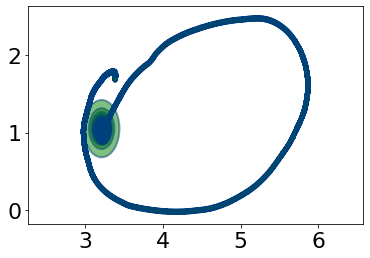

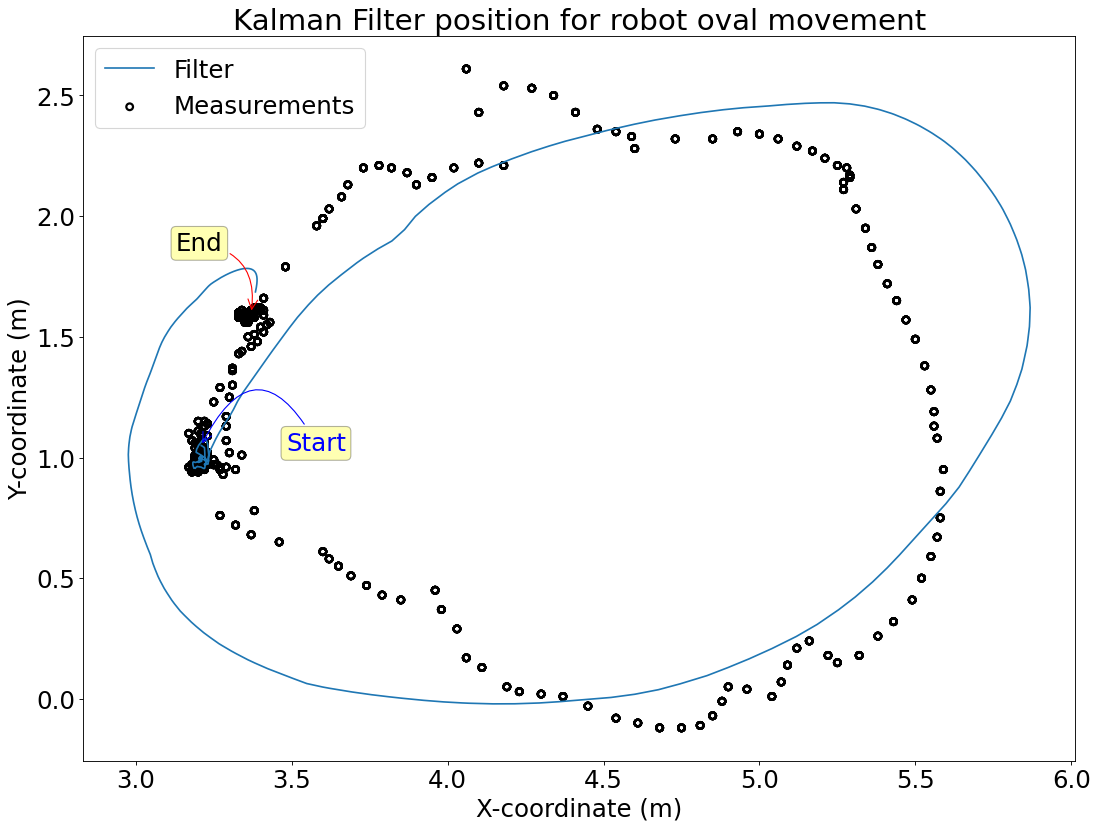

In [81]:
def track():
    tracker = KalmanFilter(dim_x=4, dim_z=2)
    dt = 0.01
    tracker.F = np.array([[1, dt, 0,  0],
                          [0,  1, 0,  0],
                          [0,  0, 1, dt],
                          [0,  0, 0,  1]])
    tracker.u = 0.
    tracker.H = np.array([[1., 0., 0., 0], [0., 0., 1., 0.]])

    tracker.R = np.array([[sensor_var, 0], [0, sensor_var_lateral]])
    q_forward = Q_discrete_white_noise(dim=2, dt=dt, var=process_var)
    q_lateral = Q_discrete_white_noise(dim=2, dt=dt, var=process_var_lateral)
    tracker.Q = block_diag(q_forward, q_lateral)
#     print(f"Q = {tracker.Q}")
    tracker.x = np.array([[uwb_x1[ini_index1], vel_linear_x1[0], uwb_y1[ini_index1], 0]]).T
    tracker.P = np.eye(4) * 0.5
    return tracker
# robot circle movement
N = len(uwb_x1[ini_index1:])
zs1 = np.array([[uwb_x1[i], uwb_y1[i]] for i in range(ini_index1, N)])

# run filter
robot_tracker = track()
# batch_filter is quite slow
mu, cov, _, _ = robot_tracker.batch_filter(zs1[ini_index1:])

for x, P in zip(mu, cov):
#     covariance or x and y
    cov = np.array([[P[0, 0], P[2, 0]],
                   [P[0, 2], P[2, 2]]])
    mean = (x[0, 0], x[2, 0])
#     print(f"mean = {mean}, \n cov = {cov}")
#     plot_covariance(cov, mean)
    plot_covariance_ellipse(mean, cov=cov, fc='g', std=3, alpha=0.5)

# plot result
figure(figsize=(16, 12), dpi=80)
bp.plot_filter(mu[:, 0], mu[:, 2])
plot_measurements(zs1[ini_index1:, 0], zs1[ini_index1:, 1])
plt.title('Kalman Filter position for robot oval movement')
plt.xlabel("X-coordinate (m)")
plt.ylabel("Y-coordinate (m)")
plt.annotate("Start", xy=(zs1[ini_index1][0], zs1[ini_index1][1]), xytext=(zs1[ini_index1][0] + 100, zs1[ini_index1][1] - 10), textcoords='offset points', ha='center', va='bottom',color='blue',
         bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
         arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.95', 
                            color='green'))
plt.annotate("End", xy=(zs1[-1][0], zs1[-1][1]), xytext=(zs1[-1][0] - 50, zs1[-1][1] + 50), textcoords='offset points', ha='center', va='bottom',
         bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
         arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.5', 
                            color='red'))
plt.legend(loc="upper left")
# plt.show()
# plt.savefig('oval.pdf', dpi=300)

## Pentagon movement

In [126]:
df2 = pd.read_csv('pentagon.csv')
uwb_x2 = df2.uwb_x
uwb_y2 = df2.uwb_y
vel_linear_x2 = df2['vel_linear_x'].fillna(0.0)
# first nonzero value for uwb_x
ini_index2 = uwb_x2.ne(0).idxmax()

(<matplotlib.collections.PathCollection at 0x7f3217942ad0>,)

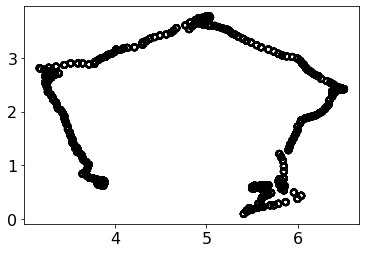

In [149]:
plot_measurements(uwb_x2[ini_index2:], uwb_y2[ini_index2:])

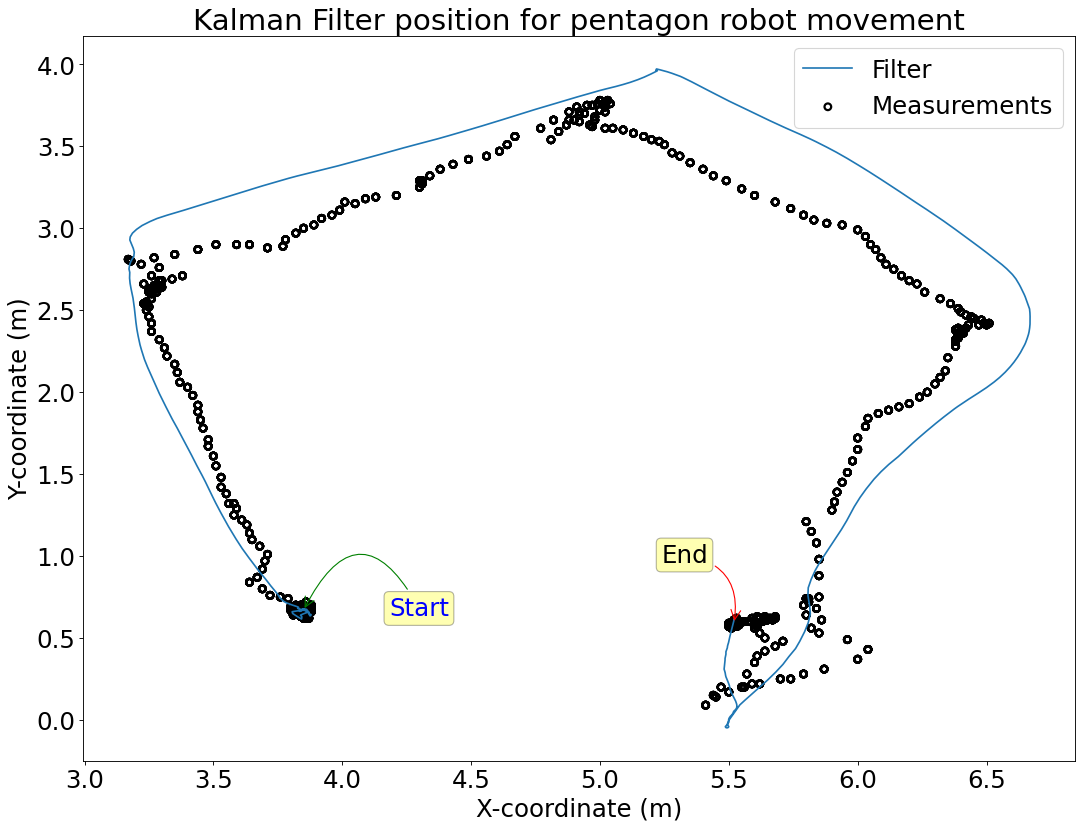

In [132]:
def track():
    tracker = KalmanFilter(dim_x=4, dim_z=2)
    dt = 0.01
    tracker.F = np.array([[1, dt, 0,  0],
                          [0,  1, 0,  0],
                          [0,  0, 1, dt],
                          [0,  0, 0,  1]])
    tracker.u = 0.
    tracker.H = np.array([[1., 0., 0., 0], [0., 0., 1., 0.]])

    tracker.R = np.array([[sensor_var, 0], [0, sensor_var_lateral]])
    q_forward = Q_discrete_white_noise(dim=2, dt=dt, var=process_var)
    q_lateral = Q_discrete_white_noise(dim=2, dt=dt, var=process_var_lateral)
    tracker.Q = block_diag(q_forward, q_lateral)
    tracker.x = np.array([[uwb_x2[ini_index2], vel_linear_x2[0], uwb_y2[ini_index2], 0]]).T
    tracker.P = np.eye(4) * 0.5
    return tracker
# robot trapezoid movement
N = len(uwb_x2)
zs2 = np.array([[uwb_x2[i], uwb_y2[i]] for i in range(ini_index2, N)])

# run filter
robot_tracker = track()
# batch_filter is quite slow
mu, cov, _, _ = robot_tracker.batch_filter(zs2)

# for x, P in zip(mu, cov):
# #     covariance or x and y
#     cov = np.array([[P[0, 0], P[2, 0]],
#                    [P[0, 2], P[2, 2]]])
#     mean = (x[0, 0], x[2, 0])
# #     print(f"mean = {mean}, \n cov = {cov}")
# #     plot_covariance(cov, mean)
#     plot_covariance_ellipse(mean, cov=cov, fc='g', std=3, alpha=0.5)

# plot result
plt.figure(figsize=(16, 12), dpi=80)
bp.plot_filter(mu[:, 0], mu[:, 2])
plot_measurements(zs2[:, 0], zs2[:, 1])
plt.title('Kalman Filter position for pentagon robot movement')
plt.xlabel("X-coordinate (m)")
plt.ylabel("Y-coordinate (m)")
plt.annotate("Start", xy=(zs2[ini_index2][0], zs2[ini_index2][1]), xytext=(zs2[ini_index2][0] + 100, zs2[ini_index2][1] - 10), textcoords='offset points', ha='center', va='bottom',color='blue',
         bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
         arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.95', 
                            color='green'))
plt.annotate("End", xy=(zs2[-1][0], zs2[-1][1]), xytext=(zs2[-1][0] - 50, zs2[-1][1] + 50), textcoords='offset points', ha='center', va='bottom',
         bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
         arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.5', 
                            color='red'))
# plt.legend(loc="upper left")
plt.legend(loc='best')
# plt.show()
plt.savefig('pentagon.pdf', dpi=300)